# Modello di Kuramoto_0:
# $\frac{d \theta _{i} }{dt} = \omega _i + \frac{K}{N}\sum_{j=1}^N A_{ij} \sin (\theta _j - \theta _i ), \ \ i = 1, ..., N$

# Modello di Kuramoto_scale_free:
# $\frac{d \theta _{i} }{dt} = \omega _i + \frac{K}{k_{i}}\sum_{j=1}^N A_{ij} \sin (\theta _j - \theta _i ), \ \ i = 1, ..., N$ 

In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import random
import numpy as np
import copy
%matplotlib widget
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
# It's also possible to use the reduced notation by directly setting font.family:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})


In [2]:
# function used

def motion(_q_0, _omegas, _K, _t_max, _dt, network):
    debug = False
    # how many vertices (oscillators)?
    _N = len(network.vs.indices)
    q = _q_0
    t = 0
    q_plot = np.zeros((int(_t_max/_dt), _N))
    dq_plot = np.zeros((int(_t_max/_dt), _N))
    dq0 = _omegas
    for t_count in range(int(_t_max/dt)):
        if debug:   print("\n", t)        
        dq = kuramoto(q, _omegas, _K, network, t)
        q_plot[t_count] = q
        dq_plot[t_count] = dq
        if debug: print(dq)
#        q = eulero_esplicito(q, dq, dt)
        q = runge_kutta4(q, dq, dt, t, omegas, _K, network )
        q = q  % (2*np.pi)
        t += _dt
    return q_plot, dq_plot

def eulero_esplicito(q, dq, dt):
    return q + dq*dt

def runge_kutta4(q, dq, h, t, omegas, _K, network):
    f = kuramoto
    k1_dot_q = f(q, omegas, _K, network, t )
    k2_dot_q = f(q + k1_dot_q*h/2, omegas,  _K, network, t + h/2)
    k3_dot_q = f(q + k2_dot_q*h/2, omegas, _K, network, t + h/2)
    k4_dot_q = f(q + k3_dot_q*h, omegas,  _K, network, t + h)
    q = (q + (k1_dot_q + 2*k2_dot_q + 2*k3_dot_q + k4_dot_q)*h/6.0)
    return q

def kuramoto_0(_q, _omegas, _K, network, t):
    _N = len(network.vs.indices)
    _dq = copy.deepcopy(_omegas)
    A_ij = network.get_adjacency()
#    print("prima", _dq)
    for i in range(_N):
        for j in range(_N):
            _dq[i] -= A_ij[i][j] * (_K/_N) * np.sin(_q[i] - _q[j])
#    print("dopo:",_dq)
    return _dq


def kuramoto(_q, _omegas, _K, network, t):
    _N = len(network.vs.indices)
    _dq = copy.deepcopy(_omegas)
    A_ij = network.get_adjacency()
#    print("prima", _dq)
    for i in range(_N):
        for j in range(_N):
            _dq[i] -= A_ij[i][j] * (_K/ ( np.sum(A_ij[i]) + 1) ) * np.sin(_q[i] - _q[j])
#    print("dopo:",_dq)
    return _dq

def kuramoto_1(_q, _omegas, _K, network, t):
    _N = len(network.vs.indices)
    _dq = copy.deepcopy(_omegas)
    A_ij = network.get_adjacency()
#    print("prima", _dq)
    for i in range(_N):
        for j in range(_N):
            _dq[i] -= A_ij[i][j] * _K * np.sin(_q[i] - _q[j])
#    print("dopo:",_dq)
    return _dq

In [3]:
def kuramoto_r(_q, _omegas, network):
    _N = len(network.vs.indices)
    A_ij = network.get_adjacency()
#    print("prima", _dq)
    for i in range(_N):
        r = np.abs( np.sum( np.exp(np.cdouble(_q)*1j) / ( np.sum(A_ij[i]) + 1) ) )
#        print(( np.sum(A_ij[i]) + 1))
#    print("dopo:",_dq)
    return r

def kuramoto_r_mean(_q_0, _omegas, _K,_t_max, _dt, network):
    r = 0
    q_plot, dq_plot = motion(_q_0, _omegas, _K, _t_max, _dt, network)
    for t_count in range(int(_t_max/dt)):
        r += kuramoto_r(q_plot[t_count], _omegas, network)
        
    #media
    r *= 1./int(t_max/dt)
    return r

In [4]:
#  initial values
# Set a random seed for reproducibility
N = 20
dt = 0.1
t_max = 10
random.seed(0)
q_0 = np.random.rand(N)*2*np.pi
omegas = np.random.rand(N)
# for plotting
t_span = np.linspace(0, t_max, int(t_max/dt))


Erdos-Renyi: IGRAPH U--- 20 190 --
+ edges:
 0 --  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19   17 --  0  1
2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19
 1 --  0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19   18 --  0  1
2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19
 2 --  0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19   19 --  0  1
2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18
 3 --  0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 4 --  0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 5 --  0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 6 --  0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19
 7 --  0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19
 8 --  0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19
 9 --  0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19
10 --  0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19
11 --  0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19
12 --  0

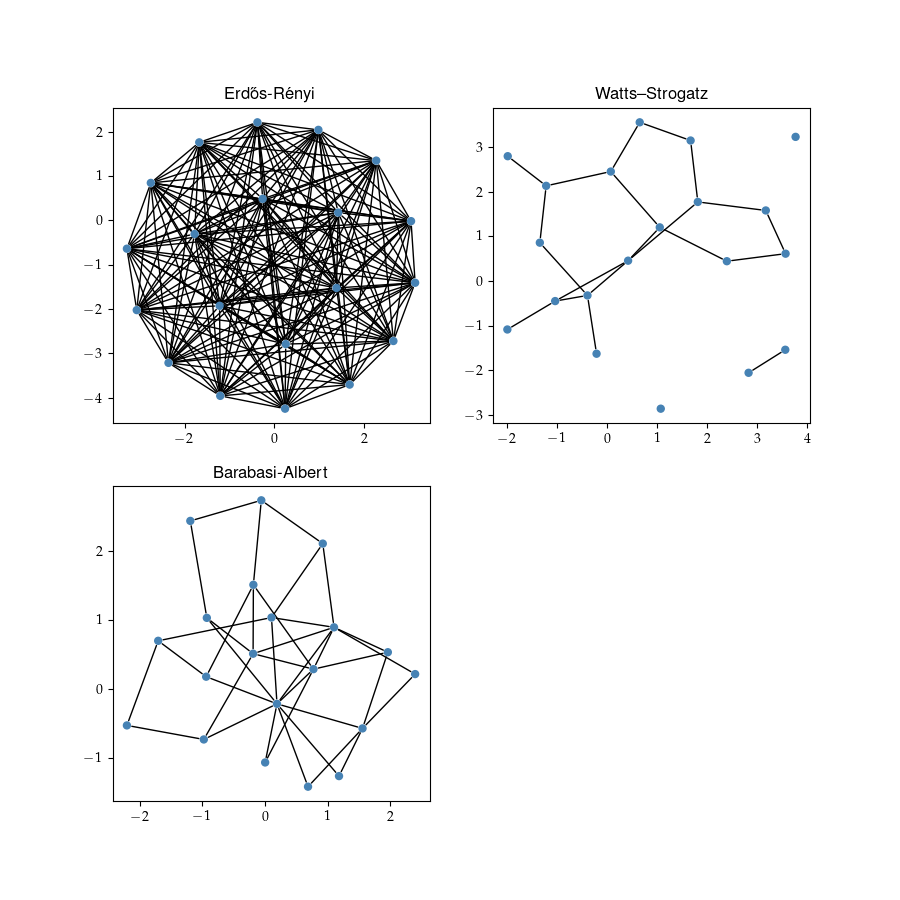

In [5]:
random.seed(0)
name_graph = {1: "Erdős-Rényi", 2: "Watts–Strogatz", 3: "Barabasi-Albert"}
# Generate Erdos Renyi graphs based on probability
g_erdos_renyi = ig.Graph.Erdos_Renyi(n=N, p=1, directed=False, loops=False)
g_watts_strogatz = ig.Graph.Watts_Strogatz(dim = 1, size = 20, nei = 1, p = 0.2)
g_barabasi_albert = ig.Graph.Barabasi(n = N, m = 2 )

# Print out summaries of each graph
print("Erdos-Renyi: {} \n Watts-Strogatz: {} \n Barabasi-Albert: {}".format(
    str(g_erdos_renyi), str(g_barabasi_albert), str(g_watts_strogatz)))


#new figure to plot network graphs
fig_graph = plt.figure(figsize = (9, 9) )
axs_graph = [fig_graph.add_subplot(2,2,1), fig_graph.add_subplot(2,2,2), fig_graph.add_subplot(2,2,3)]
ig.plot(g_erdos_renyi, target=axs_graph[0], color='pink')
ig.plot(g_watts_strogatz, target=axs_graph[1])
ig.plot(g_barabasi_albert, target=axs_graph[2])
for i in range(len(axs_graph)):  
    axs_graph[i].set(title=name_graph[i+1])


Text(0.5, 0.98, 'dQ vs t plot')

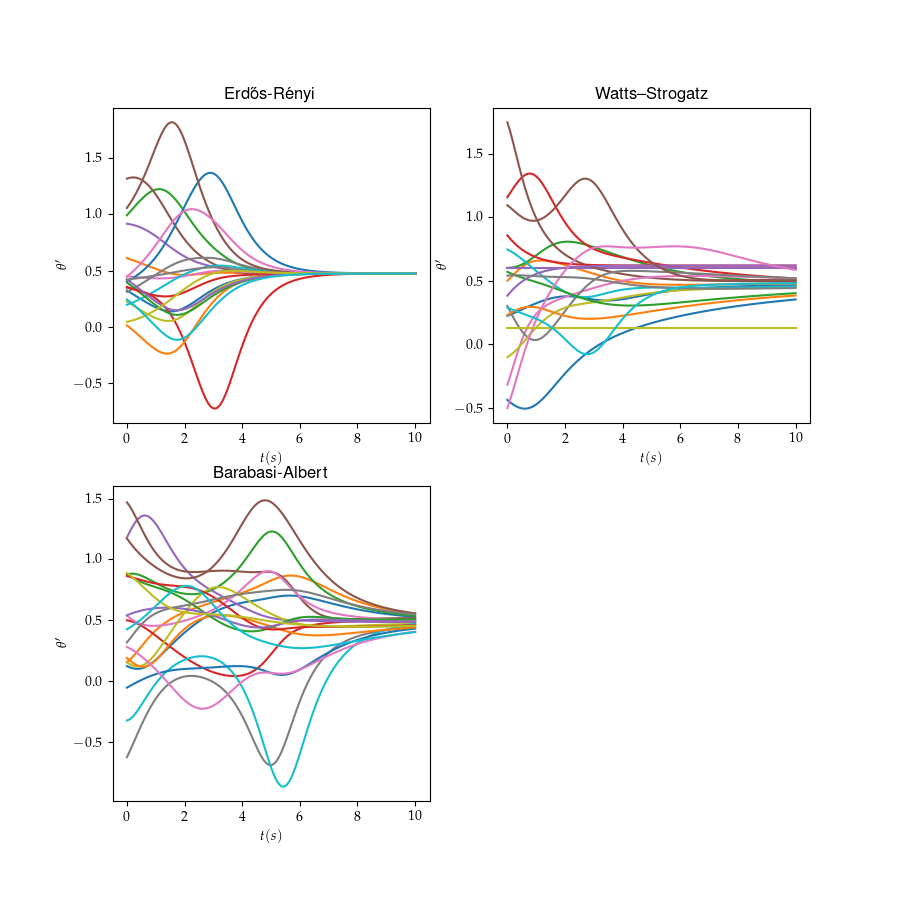

In [10]:
K = 1.4
fig_plot = plt.figure(figsize = (9, 9) )
axs_plot = [fig_plot.add_subplot(2,2,1), fig_plot.add_subplot(2,2,2), fig_plot.add_subplot(2,2,3)]

q_plot_erd_ren, dq_plot_erd_ren = motion(q_0, omegas, K, t_max, dt, g_erdos_renyi)
axs_plot[0].clear()
axs_plot[0].plot(t_span[::], dq_plot_erd_ren[::, 0:20])

q_plot_watt_strog, dq_plot_watt_strog = motion(q_0, omegas, K, t_max, dt, g_watts_strogatz)
axs_plot[1].clear()
axs_plot[1].plot(t_span[::], dq_plot_watt_strog[::, 0:20])

q_plot_barabasi_albert, dq_plot_barabasi_albert = motion(q_0, omegas, K, t_max, dt, g_barabasi_albert)
axs_plot[2].clear()
axs_plot[2].plot(t_span[::], dq_plot_barabasi_albert[::, 0:20])

for i in range(len(axs_plot)):  
    axs_plot[i].set(xlabel="$t (s)$", ylabel=r"$\theta '$", title=name_graph[i+1])

fig_plot_q_t.suptitle("dQ vs t plot", fontsize = 16)

Text(0.5, 0.98, 'Q vs t plot')

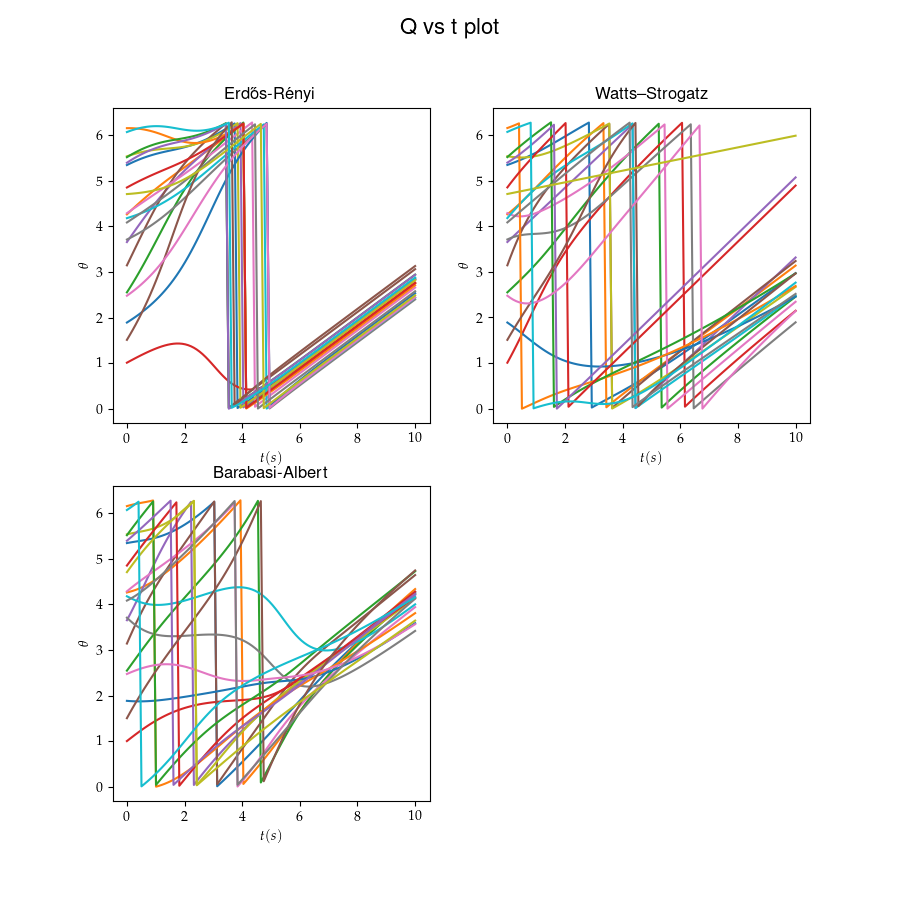

In [9]:
fig_plot_q_t = plt.figure(figsize = (9, 9) )
axs_plot_q_t = [fig_plot_q_t.add_subplot(2,2,1), fig_plot_q_t.add_subplot(2,2,2), fig_plot_q_t.add_subplot(2,2,3)]

axs_plot_q_t[0].clear()
axs_plot_q_t[0].plot(t_span[::], q_plot_erd_ren[::, 0:20])

axs_plot_q_t[1].clear()
axs_plot_q_t[1].plot(t_span[::], q_plot_watt_strog[::, 0:20])

axs_plot_q_t[2].clear()
axs_plot_q_t[2].plot(t_span[::], q_plot_barabasi_albert[::, 0:20])

for i in range(len(axs_plot_q_t)):  
    axs_plot_q_t[i].set(xlabel="$t (s)$", ylabel=r"$\theta$", title=name_graph[i+1])
fig_plot_q_t.suptitle("Q vs t plot", fontsize = 16)

### studiare il parametro d'ordine r di Kuramoto, in funzione del parametro di controllo K, e fare un plot r(K) vs K dove dovrebbe trovare una curva simile a quella di una transizione di fase (cosa che infatti è, si passa da moto disordinato a moto collettivo).

### fare la stessa simulazione (a parità di rete o di modello di rete) più e più volte, e poi mediare.

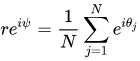

$r, \psi$ parametri d'ordine

nel caso di un network si può definire:

$ r = \frac{1}{k_i} \|  \sum_{j = 1}^N A_{ij} \sin (\theta _j - \theta _i ) \| \ , \ \ i = 1, ..., N$ 

In [51]:
random.seed(0)
q_0 = np.random.rand(N)*2*np.pi
omegas = np.random.rand(N)

K_start = 0
K_end = 100
K_step = 0.1
K_cycle = np.arange(K_start, K_end, K_step)

r_mean = []
for K in K_cycle:
    r = kuramoto_r_mean(q_0, omegas, K, t_max, dt, g_erdos_renyi)
    r_mean.append(r)
    print("K: {} - r_mean/K: {}".format(K, r))

K: 0.0 - r_mean/K: 0.09267552357723645
K: 0.1 - r_mean/K: 0.10225529816496272
K: 0.2 - r_mean/K: 0.11272196706574107
K: 0.30000000000000004 - r_mean/K: 0.12363540041260676
K: 0.4 - r_mean/K: 0.13469380548315704
K: 0.5 - r_mean/K: 0.14937786514515794
K: 0.6000000000000001 - r_mean/K: 0.19137018524743604
K: 0.7000000000000001 - r_mean/K: 0.2902265496404234
K: 0.8 - r_mean/K: 0.40276941871105076
K: 0.9 - r_mean/K: 0.5121686961011106
K: 1.0 - r_mean/K: 0.5803616140581507
K: 1.1 - r_mean/K: 0.6262701291588535
K: 1.2000000000000002 - r_mean/K: 0.6604803967225299
K: 1.3 - r_mean/K: 0.6872121552880828
K: 1.4000000000000001 - r_mean/K: 0.7084165005566315
K: 1.5 - r_mean/K: 0.7244235940764517
K: 1.6 - r_mean/K: 0.700057212458351
K: 1.7000000000000002 - r_mean/K: 0.7594591906341651
K: 1.8 - r_mean/K: 0.7776155277258119
K: 1.9000000000000001 - r_mean/K: 0.792008068189922
K: 2.0 - r_mean/K: 0.8041515797944411
K: 2.1 - r_mean/K: 0.8146764978516121
K: 2.2 - r_mean/K: 0.8239473495410294
K: 2.300000000

K: 19.0 - r_mean/K: 0.9753685796389528
K: 19.1 - r_mean/K: 0.9754669786795581
K: 19.200000000000003 - r_mean/K: 0.9755642739872716
K: 19.3 - r_mean/K: 0.9756604807340851
K: 19.400000000000002 - r_mean/K: 0.9757556141528119
K: 19.5 - r_mean/K: 0.975849689691339
K: 19.6 - r_mean/K: 0.9759427231448911
K: 19.700000000000003 - r_mean/K: 0.9760347307582338
K: 19.8 - r_mean/K: 0.976125729291555
K: 19.900000000000002 - r_mean/K: 0.9762157360459185
K: 20.0 - r_mean/K: 0.9763047688465148
K: 20.1 - r_mean/K: 0.9763928459839916
K: 20.200000000000003 - r_mean/K: 0.9764799861161116
K: 20.3 - r_mean/K: 0.9765662081338421
K: 20.400000000000002 - r_mean/K: 0.9766515309971964
K: 20.5 - r_mean/K: 0.976735973547494
K: 20.6 - r_mean/K: 0.9768195543032717
K: 20.700000000000003 - r_mean/K: 0.976902291247694
K: 20.8 - r_mean/K: 0.9769842016154027
K: 20.900000000000002 - r_mean/K: 0.9770653016867722
K: 21.0 - r_mean/K: 0.977145606597178
K: 21.1 - r_mean/K: 0.9772251301684964
K: 21.200000000000003 - r_mean/K: 0

K: 37.9 - r_mean/K: 0.9784580575436693
K: 38.0 - r_mean/K: 0.9784852788198057
K: 38.1 - r_mean/K: 0.9781797653130299
K: 38.2 - r_mean/K: 0.9782718264259243
K: 38.300000000000004 - r_mean/K: 0.9784927659527952
K: 38.400000000000006 - r_mean/K: 0.9782870695807696
K: 38.5 - r_mean/K: 0.9786294336387131
K: 38.6 - r_mean/K: 0.9786882599311079
K: 38.7 - r_mean/K: 0.978404502877026
K: 38.800000000000004 - r_mean/K: 0.9782780253272381
K: 38.900000000000006 - r_mean/K: 0.9780517053773308
K: 39.0 - r_mean/K: 0.9780679786838302
K: 39.1 - r_mean/K: 0.9720513110815572
K: 39.2 - r_mean/K: 0.9620085491510448
K: 39.300000000000004 - r_mean/K: 0.9548022489285589
K: 39.400000000000006 - r_mean/K: 0.966749520598019
K: 39.5 - r_mean/K: 0.9742141036779889
K: 39.6 - r_mean/K: 0.9758199051470066
K: 39.7 - r_mean/K: 0.9615594766473574
K: 39.800000000000004 - r_mean/K: 0.9709867976546286
K: 39.900000000000006 - r_mean/K: 0.9575247305015628
K: 40.0 - r_mean/K: 0.9695845621666167
K: 40.1 - r_mean/K: 0.9726684176

K: 56.400000000000006 - r_mean/K: 0.6867927381894166
K: 56.5 - r_mean/K: 0.6686476337231123
K: 56.6 - r_mean/K: 0.6923468125172698
K: 56.7 - r_mean/K: 0.6868064226789085
K: 56.800000000000004 - r_mean/K: 0.6674321668010903
K: 56.900000000000006 - r_mean/K: 0.6891138915912248
K: 57.0 - r_mean/K: 0.6801281249746098
K: 57.1 - r_mean/K: 0.6531338951443212
K: 57.2 - r_mean/K: 0.6745838349728962
K: 57.300000000000004 - r_mean/K: 0.6608720161932977
K: 57.400000000000006 - r_mean/K: 0.6748153980394912
K: 57.5 - r_mean/K: 0.7028654005603275
K: 57.6 - r_mean/K: 0.6584147033878262
K: 57.7 - r_mean/K: 0.6722435627299163
K: 57.800000000000004 - r_mean/K: 0.6834210845165868
K: 57.900000000000006 - r_mean/K: 0.6997773411726269
K: 58.0 - r_mean/K: 0.659650091484077
K: 58.1 - r_mean/K: 0.6662236403080235
K: 58.2 - r_mean/K: 0.6519270725777362
K: 58.300000000000004 - r_mean/K: 0.6688874264241643
K: 58.400000000000006 - r_mean/K: 0.7038887089886106
K: 58.5 - r_mean/K: 0.6723019756835791
K: 58.6 - r_mean/

K: 75.60000000000001 - r_mean/K: 0.5579753461184711
K: 75.7 - r_mean/K: 0.5650850557333201
K: 75.8 - r_mean/K: 0.5297972051040185
K: 75.9 - r_mean/K: 0.538105185203941
K: 76.0 - r_mean/K: 0.5479751426429087
K: 76.10000000000001 - r_mean/K: 0.5529841881250465
K: 76.2 - r_mean/K: 0.5270054637347099
K: 76.3 - r_mean/K: 0.5334330670163325
K: 76.4 - r_mean/K: 0.5721090775950127
K: 76.5 - r_mean/K: 0.5360643230341721
K: 76.60000000000001 - r_mean/K: 0.5241440111560947
K: 76.7 - r_mean/K: 0.5403808564867659
K: 76.80000000000001 - r_mean/K: 0.5363173855690658
K: 76.9 - r_mean/K: 0.5516638625227044
K: 77.0 - r_mean/K: 0.5262852465750618
K: 77.10000000000001 - r_mean/K: 0.5355214382434689
K: 77.2 - r_mean/K: 0.5513660824329435
K: 77.30000000000001 - r_mean/K: 0.5348978446173751
K: 77.4 - r_mean/K: 0.5113272894001646
K: 77.5 - r_mean/K: 0.539760557285902
K: 77.60000000000001 - r_mean/K: 0.5327199788198307
K: 77.7 - r_mean/K: 0.5429970920501055
K: 77.80000000000001 - r_mean/K: 0.5365814837351802
K

K: 94.30000000000001 - r_mean/K: 0.5325307959221457
K: 94.4 - r_mean/K: 0.5133866205322365
K: 94.5 - r_mean/K: 0.5096137122329635
K: 94.60000000000001 - r_mean/K: 0.5030879845253728
K: 94.7 - r_mean/K: 0.5197000757790062
K: 94.80000000000001 - r_mean/K: 0.5087466600027324
K: 94.9 - r_mean/K: 0.5207415435162661
K: 95.0 - r_mean/K: 0.5319822410100348
K: 95.10000000000001 - r_mean/K: 0.5167369309925096
K: 95.2 - r_mean/K: 0.5804353053727412
K: 95.30000000000001 - r_mean/K: 0.5053778249873452
K: 95.4 - r_mean/K: 0.5130206182261197
K: 95.5 - r_mean/K: 0.5306628132981241
K: 95.60000000000001 - r_mean/K: 0.534784432770066
K: 95.7 - r_mean/K: 0.5597216642681044
K: 95.80000000000001 - r_mean/K: 0.4631047481230145
K: 95.9 - r_mean/K: 0.5516216764442039
K: 96.0 - r_mean/K: 0.44639975884184685
K: 96.10000000000001 - r_mean/K: 0.5109783113148724
K: 96.2 - r_mean/K: 0.5063677227473258
K: 96.30000000000001 - r_mean/K: 0.5463676794856244
K: 96.4 - r_mean/K: 0.5192477849886824
K: 96.5 - r_mean/K: 0.479

[Text(0.5, 0, '$K$'), Text(0, 0.5, '$r (K)$'), Text(0.5, 1.0, 'Erdős-Rényi')]

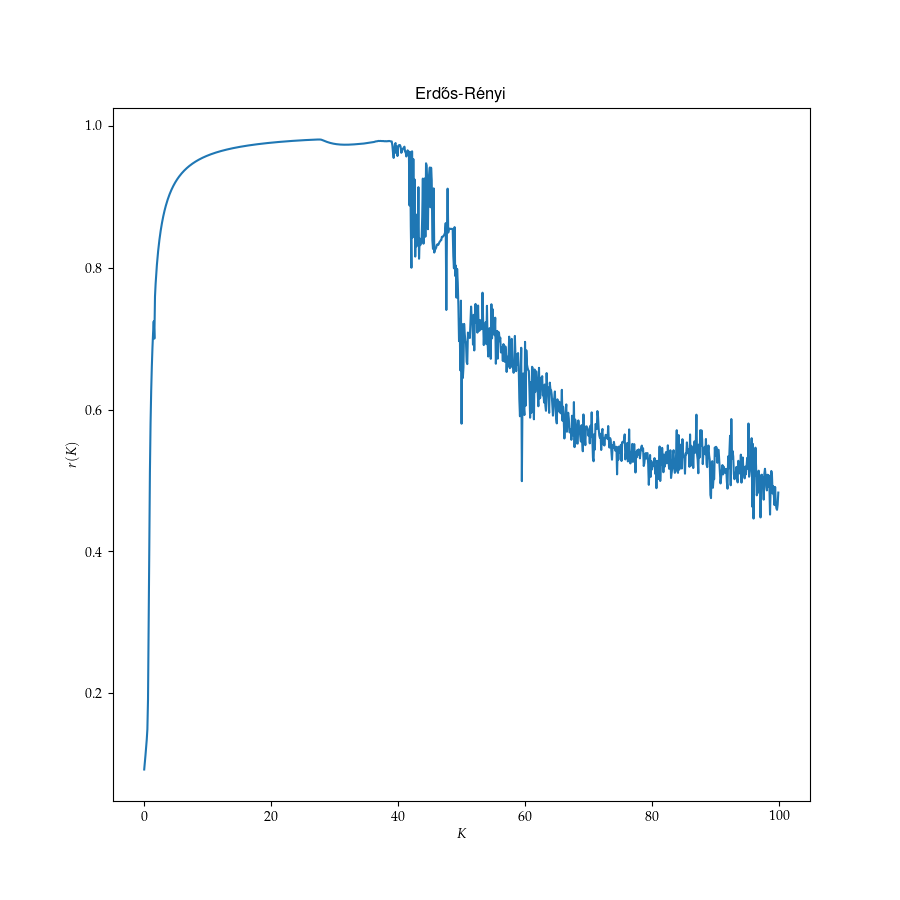

In [53]:
plt.close
fig_plot_r = plt.figure(figsize = (9, 9) )
axs_plot_r = [fig_plot_r.add_subplot(1,1,1)]
axs_plot_r[0].clear()
axs_plot_r[0].plot(K_cycle[::], r_mean)
axs_plot_r[0].set(xlabel="$K$", ylabel=r"$r (K)$", title=name_graph[2])

In [ ]:
plt.close
fig_plot_r = plt.figure(figsize = (9, 9) )
axs_plot_r = [fig_plot_r.add_subplot(1,1,1)]
axs_plot_r[0].clear()
axs_plot_r[0].plot(K_cycle[::], r_mean)
axs_plot_r[0].set(xlabel="$K$", ylabel=r"$r (K)$", title=name_graph[1])